This notebook contains some more-or-less random graphs that help us get a feel for the data we'll be working with.

In [1]:
# first, read in the data

import os
import csv

os.chdir('../data/')

records = []

with open('call_records.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        records.append(row)

print(records[0]) # print the header
records = records[1:] # remove the header
print(records[0]) # print an example record

['time', 'cell', 'from', 'to']
['0', '186', '974-703-1399', '876-251-8837']


This shows the data we're working with - the header row, containing:

|field | description                                 |
|------|---------------------------------------------|
|time  | when the call occurred                      |
|cell  | the location ("cell") the call was made from|
|from  | the number initiating the call              |
|to    | the number which received the call          |

It also shows one row of example data, so you can see the format they're all in.

In [2]:
import matplotlib.pyplot as plt # import our graphing module
plt.rcParams["figure.figsize"] = (15,5) # set the default figure size

Now that we're all set up, let's start making some graphs:

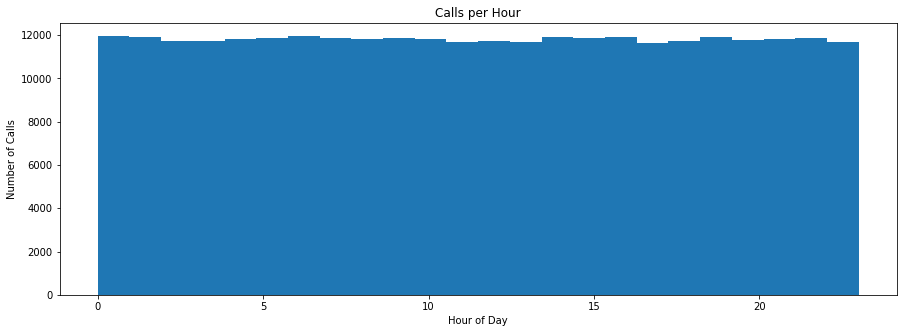

In [3]:
# get the list of times that calls occurred, modulo 24 so we get the hour of day
times = [int(record[0]) % 24 for record in records]

# the histogram of the data
plt.hist(times, bins=24)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Hour')

plt.show()

Hm, ok, looks like the calls happen pretty uniformly over any given day. (this is an example of how the data I've generated is definitely not realistic)

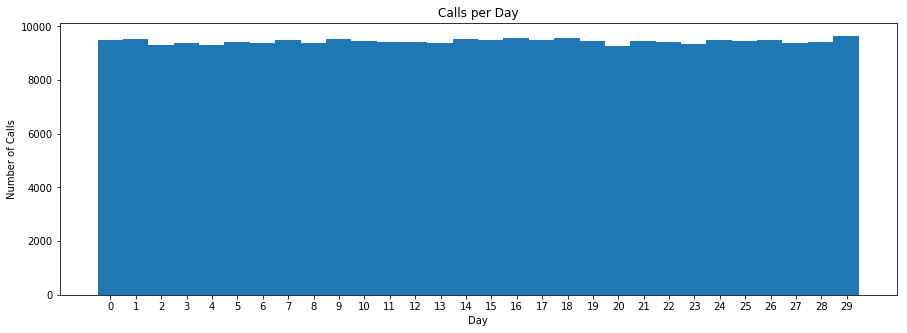

In [4]:
# same thing, but not modulo day so we get per-day volume
import math
times = [int(record[0]) for record in records]
nbins = math.ceil(max(times)/24)
# the histogram of the data
plt.hist(times, bins=nbins) # one bin per day

plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Day')
plt.xticks(range(12, max(times), 24), range(nbins+1))


plt.show()

And it looks like the calls are also of uniform volume over the days - this means we probably can't get any use out of trying to find e.g. when people make calls, since it seems totally uniformly random.

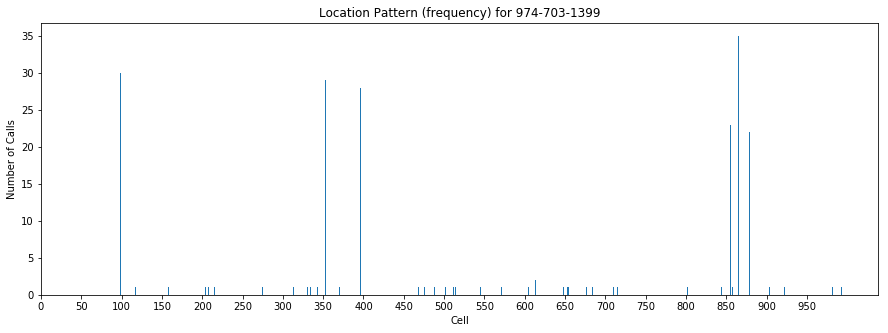

In [5]:
number = '974-703-1399'
cells = [int(r[1]) for r in records if r[2] == number]

uniq_cells = sorted(list(set(cells)))
freq = [cells.count(x) for x in uniq_cells]

plt.bar(uniq_cells, freq)

plt.xlabel('Cell')
plt.ylabel('Number of Calls')
plt.title('Location Pattern (frequency) for {}'.format(number))

plt.xticks(range(0, max(uniq_cells), 50))

plt.show()

Interesting, it looks like this person (and presumably other people - maybe play around a little with what number you're graphing) calls from several locations very frequently, and a few others from time to time.

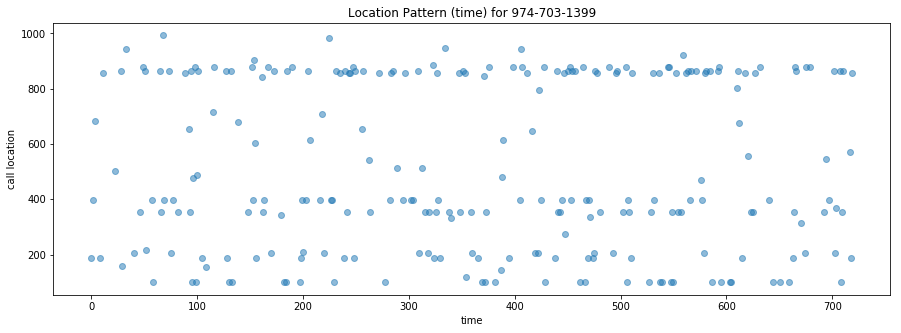

In [13]:
time_location = [[int(r[0]), int(r[1])] for r in records if r[2] == number]

time, location = ([a for a,b in time_location], [b for a,b in time_location])

plt.scatter(time, location, alpha=0.5)
plt.title('Location Pattern (time) for {}'.format(number))
plt.ylabel('call location')
plt.xlabel('time')
plt.show()

The graph above shows every call record over time horizontally, with the location they called from vertically. Looks like they mostly call from a couple of places, with occasional other ones scattered in more-or-less randomly over time. It doesn't look like the times and locations are correlated, though (they don't always call from location A between 12:00 and 2:00, for example).

IMPORTANT CAVEAT: the vertical doesn't mean anything other than random locations - so, if a dot is in between two frequent locations vertically, it doesn't mean they were traveling from one to the other.

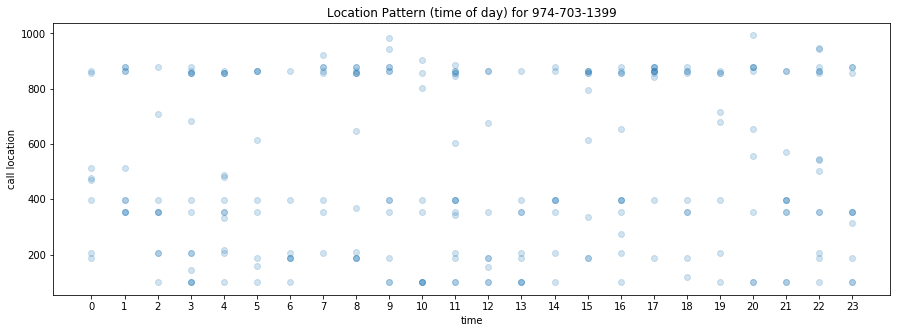

In [10]:
time_location = [[int(r[0]), int(r[1])] for r in records if r[2] == number]

time, location = ([int(a) % 24 for a,b in time_location], [b for a,b in time_location])

plt.scatter(time, location, alpha=0.2)
plt.title('Location Pattern (time of day) for {}'.format(number))
plt.ylabel('call location')
plt.xlabel('time')
plt.xticks(range(24))
plt.show()

This graph shows the same as the one before it, but normalized to 24 hours. There are a couple of things to note here - first, that there doesn't appear to be a pattern. As we discovered above, the call times seem pretty random. Secondly, the calls only seem to be per hour - we don't get any more fidelity than that, which we'll need to keep in mind for some machine learning techniques.

This graph is partially transparent so that overlapping dots are visible - otherwise, any call frequency over one per hour would be essentially invisible.

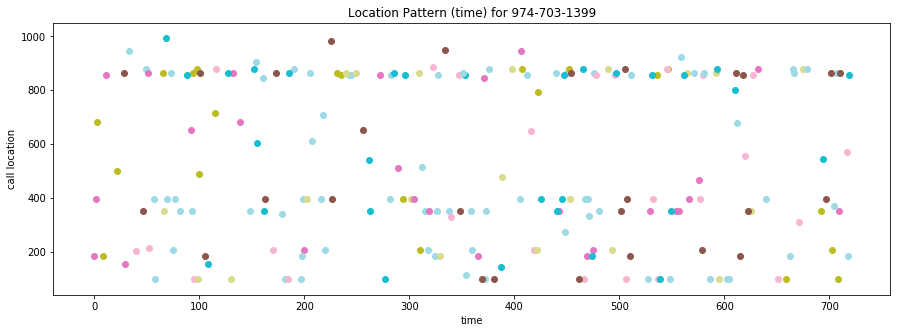

In [8]:
import matplotlib.cm as cm

time_location_to = [[int(r[0]), int(r[1]), (r[3])] for r in records if r[2] == number]

# the recipients of the calls
to = [c for a,b,c in time_location_to]

colors = cm.tab20(range(0, len(set(to))))

# this will only generate a color mapping for 20 numbers - the rest will be left out
colormap = {}
for recipient,color in zip(to, colors):
    colormap[recipient] = color[0:3]

for recipient,color in colormap.items():
    data = list(filter(lambda x: x[2] == recipient, time_location_to))
    time, location = ([a for a,b,c in data], [b for a,b,c in data])
    plt.scatter(time, location, c=color)
    
plt.title('Location Pattern (time) for {}'.format(number))
plt.ylabel('call location')
plt.xlabel('time')
plt.show()

This graph is the same as the above, but the recipient is shown by the color of the dot. Unfortunately, this isn't very useful - there's a lot of data and not a lot of pattern. Oh well, this happens sometimes, and it's worth the shot to try.

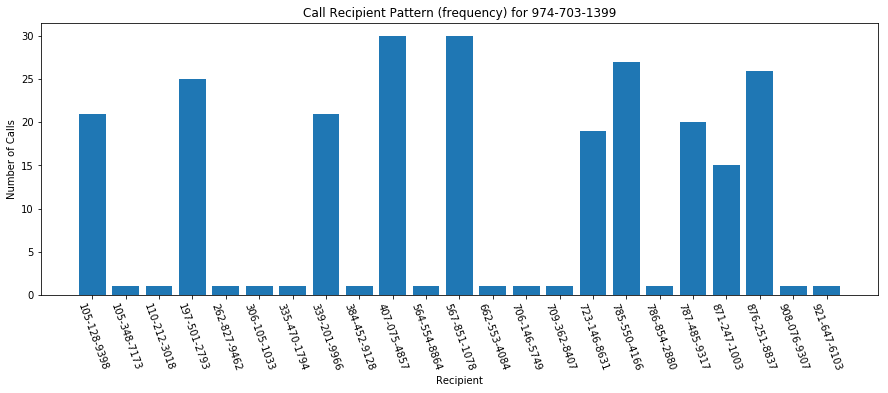

In [9]:
recipients = [r[3] for r in records if r[2] == number]

uniq_recipients = sorted(list(set(recipients)))
freq = [recipients.count(x) for x in uniq_recipients]

plt.bar(range(len(uniq_recipients)), freq)

plt.xlabel('Recipient')
plt.ylabel('Number of Calls')
plt.title('Call Recipient Pattern (frequency) for {}'.format(number))

plt.xticks(range(0, len(uniq_recipients)), uniq_recipients, rotation=-70)

plt.show()

This is interesting as well - looks like this person calls a certain set of people way more than most. This might be useful to uniquely fingerprint them!